# How DDI Works ? 
Authors : Outlaw Group, Centrale Nantes, France

[Leygue et al., Data-based derivation of material response, CMAME 2018]

## Basics and an illustrative example
______________________________________________________________________________________


### DDI at a glance 


Data Driven Identification (DDI) aims at computing stresses on a structure where displacement field $(u)$ and applied forces $(f)$  are known but not the mechanical behaviour law. DDI gives us, first, the **balanced stress field** $(\sigma)$ in the structure (stress tensor in each element) and second, a **Strain-Stress data set** $(\varepsilon^\star,\sigma^\star)$. The Strain-Stress data set is needed to solve the ill-posed problem of equilibrium in the absense of a material law, its size, $(N_{ss})$, is smaller than the number of elements $(N_e)$ of the structure. This data set can also be seen as an atractor allowing the minimisation of the variance of the stress field.

> **Input** 
>    * 2D mesh of a structure
>    * Node displacement field $u$ of size $N_e$  - Typically from DIC
>    * Applied net forces - Typicaly from a load cell
> 
> **Output** 
>    * Stress field $(\sigma)$ - preserving balance of momentum
>    * Clusturized Strain-Stress data base $(\varepsilon^\star,\sigma^\star)$ of size $N_{ss}$
> 
> **Parameters** 
> 1. $r$ : clustering ratio [no unit]  $\left(r = \frac{N_e}{N_{ss}}\right)$
> 2. $\mathcal C_0$ : Algorithmic stiffness [Pa]

![synopsis](synopsis.png)

## Definitions, Problem & Equations to be solved

### 1. Definitions:

   * **The Clustering** is the pairing between each couple $(\varepsilon,\sigma)_e$ of an element $e$  with a couple $i$ of the data-set $(\varepsilon^\star,\sigma^\star)_i$. $(\varepsilon^\star,\sigma^\star)$ is a weighted average of a subset of $(\varepsilon,\sigma)$. Obviously, $N_e > N_{ss}$.
    
   * Clusterization is defined by the  the pairing operator $S$ such as $\sigma_e^\star = P_{ie}\sigma_i^\star$. $S$ is an unknown of the problem.
   * Illustration of  $S$ :

![pairing](pairing.png)


   * $\mathcal C_0$  **norm** is define on a couple $(\textbf{a},\textbf{b})$ of tensors of order 2 (typically a strain and a stress) by the definition : 
   $$  \Vert \textbf{a},\textbf{b}\Vert_{\mathcal C_0}   =  \left [\textbf{a}:\mathcal C_0:\textbf{a}+  \textbf{b}:\mathcal C_0^{-1}:\textbf{b} \right ]^\frac{1}{2}, \quad \mathcal C_0 \text{ a 4th order symmetric positive definite tensor. } $$

### 2. Problem: 

 **$\varepsilon$ and $f$ being known, find $(\sigma,\varepsilon^\star,\sigma^\star,S)$ minimizing the $\mathcal C_0$ norm between $(\varepsilon,\sigma)$ and $(\varepsilon^\star,\sigma^\star)$ and which preserve the equilibrium of the structure.**

   * $$ \Vert \varepsilon - S\varepsilon^\star,  \sigma - S\sigma^\star\Vert_{\mathcal C_0}   =  \left [(\varepsilon - S\varepsilon^\star):\mathcal C_0:(\varepsilon - S\varepsilon^\star)+  (\sigma - S\sigma^\star):\mathcal C_0^{-1}:(\sigma - S\sigma^\star)\right ]^\frac{1}{2}, $$

   * $$ \text{and } \quad div\,\sigma = f, \quad \forall M \in \text{Structure}$$


$\mathcal C_0$ has the dimension of a stiffness tensor.
   
**That can be rewritten in a variational form**:

  $$\text{Find, }\;(\color{green}{\sigma} , \color{red}{\varepsilon^\star},\color{red}{\sigma^\star}, \color{brown}{\eta})\;\color{black}{\text{that make the following functional stationary, for a given } }\color{blue}{S}$$ 
  $$\mathcal E(\color{green}{\sigma} , \color{red}{\varepsilon^\star},\color{red}{\sigma^\star}, \color{blue}{S},\color{brown}{\eta}\color{black}{)} = \frac{1}{2}\int_V \left[\Vert \varepsilon - \color{blue}{S}\color{red}{\varepsilon^\star},\color{green}{\sigma} - \color{blue}{S}\color{red}{\sigma^\star}\color{black}{}\Vert_{\mathcal C_0}^2 - (div\,\color{green}{\sigma}\color{black}{} -f)\,\color{brown}{\eta}\color{black}{}\right ]dV$$

  With $\color{brown}{\eta}$ a Lagrange Multiplier (dimension of a displacement vector in [m]).
 
### 3. Derivation of variational equation:

The derivation of the above fonctional $\delta \Phi = 0 $ gives us the following equations needed to find the unknowns $(\sigma , \varepsilon^\star,\sigma^\star, \eta)$ : 
   
\begin{align}
\nonumber
&\delta \varepsilon^\star \quad &\Rightarrow& \quad  \int_{V}  \mathcal C_0:\left( \varepsilon - S\varepsilon^\star \right)dV  &= 0\quad \forall V \quad &(1)\\
\nonumber
&\delta \sigma^\star \quad &\Rightarrow& \quad  \int_{V}  \mathcal C_0^{-1}:\left( \sigma - S\sigma^\star \right)dV  &= 0\quad \forall V\quad &(2)\\
\nonumber
&\delta \eta \quad &\Rightarrow& \quad  \int_V  (div\,\sigma -f)\,dV &= 0  \quad \forall V\quad &(3)\\
\nonumber
&\delta \sigma \quad &\Rightarrow& \quad  \left(\sigma - S\sigma^\star \right) =  \mathcal C_0:grad^s(\eta) &\quad \forall M\quad &(4) 
\end{align}

   * Equations 1 and 2  state that  $\varepsilon^\star$ (resp. $\sigma^\star$) is a weighted average of a cluster of $\varepsilon$ (resp. $\sigma$)
   * Equation 3 is the standard balance of momentum equation on the whole structure.
   * Equation 4 states the distance between $\sigma$ and $\sigma^\star$ is proportional to the gradient of $ grad^s(\eta)$ (a kind of strain)
   

________________________________________________________________________________


## Discrete format
In 1D using bar elements (instead 2D elements):
> - $(\varepsilon,\sigma)$ become scalar (instead of tensors)
> - $\mathcal C_0$ is just a scalar $C_0$
> - Only one snapshot is considered
> - the bar elements are assigned a unit heigh
> - the unit for length is pixel

The variational form can be rewritten as:

\begin{align}
\nonumber
\mathcal E(\color{green}{S_e} , \color{red}{E^\star},\color{red}{S^\star}, \color{blue}{S},\color{brown}{L}\color{black}{}) & = &\frac{1}{2}C_0 \left[E_e - \color{blue}{S}~\color{red}{E^\star}\color{black}{}\right]^T~W~\left[E_e - \color{blue}{S}~\color{red}{E^\star}\color{black}{}\right]\\
\nonumber
 & &+\frac{1}{2}C^{-1}_0 \left[\color{green}{S_e}- \color{blue}{S}~\color{red}{S^\star}\color{black}{}\right]^T~W~\left[\color{green}{S_e} - \color{blue}{S}~\color{red}{S^\star}\color{black}{}\right]\\
\nonumber
 & &-\left[B^T~W~\color{green}{S_e}\color{black}{}-F_{ext}\right]^T~\color{brown}{L}
\end{align}



where $B$ is such that $E_e=B~U$, $U$ being a vector collecting the nodal displacements (data), $W$ is a diagonal matrix collecting the surface of each bar element ($E_e,\color{green}{S_e}$) are vectors collecting the strain and stress in each element, ($\color{red}{S^\star},\color{red}{S^\star}$) are vectors containing the values of ($\color{red}{\varepsilon^\star},\color{red}{\sigma^\star}$) and $\color{brown}{L}$ a vector collecting the value of nodal Lagrange multipliers. The stationarity conditions recast as:


\begin{align}
\nonumber
&\delta E^\star \quad &\Rightarrow& \quad (S^T~S) E^\star = S^T~E_e &\quad (I)\\
\nonumber
&\delta S^\star \quad &\Rightarrow& \quad (S^T~S) S^\star = S^T~S_e&\quad (II)\\
\nonumber
&\delta L \quad &\Rightarrow& \quad B^T~W~S_e=F_{ext}&\quad (III)\\
\nonumber
&\delta S_e \quad &\Rightarrow& \quad  C_0^{-1}W\left(S_e - S~S^\star \right) + W~B~L =0&\quad (IV)\\
\end{align}

In pratice the full $F_{ext}$ vector is not known. Only one component of the resulting force applied on one side of the sample can be measured. A two matrices $D$ and $D_c$ are introduced. 
$$ D=B^T~W\quad \quad D_c=\Lambda B^T~W$$
where $\Lambda$ is such that:
>- the lines of $D$ corresponding to vanishing nodal forces are kept,
>- the lines of $D$ corresponding to non-vanishing nodal forces are removed,
>- lines corresponding to measuring resulting force (sum of one component of nodal forces along one edge e.g.) are added.
The external force vector is modified accordingly and named $\bar{F}_{ext}$.


The first two systems of equations $(I,II)$:
\begin{align}
(S^T~S) E^\star = S^T~E_e\\
(S^T~S) S^\star = S^T~S_e\\
\end{align}
are easily solved independently as $(S^T~S)$ is diagonal. In the following they will be solved together when updating $S$ the selection matrix obtained from the labelling of a k-means algorithm. 


The two next lines $(III,IV)$ are included in the following linear system 
$$
\left[
\begin{array}{cc}
C_0^{-1}W & D_c^T\\
D_c & 0\\
\end{array}
\right]
\left[
\begin{array}{c}
S_e\\
L\\
\end{array}
\right]
=
\left[
\begin{array}{c}
C_0^{-1}W~S~S^\star\\
\bar{F}_{ext}\\
\end{array}
\right]
$$
The resolution is performed by computing first the Lagrange multipliers $L$:
$$ (Dc~W^{-1}~Dc^T)L=Dc~S~S^\star-\bar{F}_{ext}$$
and then the stress:
$$S_e=S~S^\star-C_0~W^{-1}~D_c^T~L $$ 

The following algorithm is used latter on
>- #### While 
>    - Update $S$ using k-means
>    - Solve $(S^T~S) E^\star = S^T~E_e$
>    - Solve $(S^T~S) S^\star = S^T~S_e$
>    - Solve $(Dc~W^{-1}~Dc^T)L=Dc~S~S^\star-\bar{F}_{ext}$
>    - Update $S_e=S~S^\star-C_0~W^{-1}~D_c^T~L $

Note that the three steps could be performed in a single one but, usually k-means function use a $L_2$ norm for evaluating the distance between clusters and samples. Here the norm for this distance is $\Vert \textbf{a},\textbf{b}\Vert_{C_0}$. K-means is thus called with ($E_e\sqrt{C_0},S_e/\sqrt{C_0}$) instead of ($E_e,S_e$) as input. The coordinates of the clusters ($E^\star,S^\star$) are thus not a direct output of kmeams. Their are udpated by solving systems ($I,II$) suing the new $S$.

## Numerical implementation

In [124]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
from scipy.sparse import csr_matrix as smatrix
import scipy.sparse.linalg as splinalg
import h5py
import scipy.io as sio
from sklearn.cluster import KMeans
import fem

### Application parameters

In [125]:
# Units m->pixel=m/pix2m
# Pa=kg/m/s^2->kg/pixel/s^2=Pa*pix2m
# N = kg.m/s^2->kg.pixel/s^2=N/pix2m
# N/m = kg/s^2->kg/s^2=N/m
stdu=0.1 # noise level displacement in pixel
stdf=.0 # N noise level on force
pix2m=25.e-6; # pixel to m conversion
thickness=3e-3 # specimen thicness in m


### DDI parameters

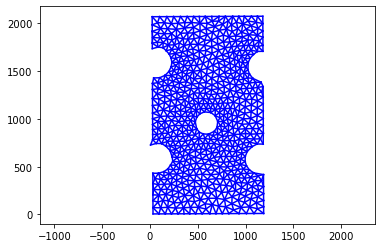

In [126]:
Ns=50 # number of material states
inp='dic-coarse.res'# input file
(X,conn)=fem.readDICmesh(inp)# loading the mesh
model=fem.FEModel() # instantiating a model
model.X=X # Nodes
model.conn=conn # Connectivity
Nnodes=X.shape[0]
Nelems=conn.shape[0]

model.Assemble() # Assembly
W=model.W # Weighting matrix
B=model.B # B matrix for computing strain from displacement

npz=np.load('fem-from-dic.npz')
U=npz['U'] # Input displacement from FE simulation
Fres=(npz['Fres']+stdf)/thickness # Input force from FE simulation
Sref=npz['Sref']*pix2m # Stress field from the FE simulation used as imput data
E_e=B.dot(U) # Input strain
Eref=E_e # considered as the reference
dE_e=B.dot(stdu*np.random.randn(U.size))# noise
E_e=Eref+dE_e # strain to be considered as imput for DDI

# Setting the algorithmic stiffness
L=max(X[:,1])-min(X[:,1])
dL=np.max(U[Nnodes::])-np.min(U[Nnodes::])
section=max(X[:,0])-min(X[:,0])
Co=(Fres/section)/(dL/L)*pix2m

# Display the sample 
plt.plot(X[conn,0].T,X[conn,1].T,'b-');
plt.axis('equal');


### Boundary conditions
The internal force vector is $0$ everywhere except:
>- on the bottom where the distribution of its $x$ component is unknown
>- on the bottom where the distribution of its $y$ component is unknown
>- on the top where the distribution of its $x$ component is unknown
>- on the top where the sum of the distribution of its $y$ component equals the measured load


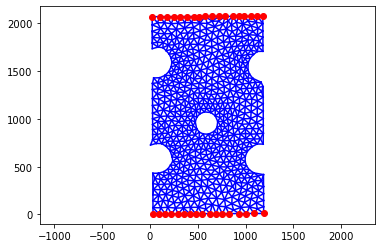

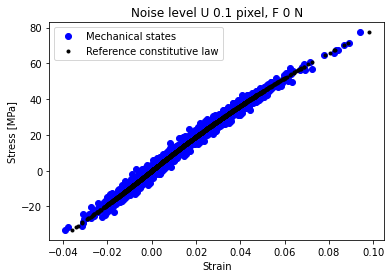

In [127]:

top=X[:,1]>max(X[:,1])*0.99
bot=X[:,1]<max(X[:,1])*0.01

nodes_index=np.arange(Nnodes)
top_nodes=nodes_index[top]
ntop=top_nodes.size
free=np.logical_not(np.logical_or(top, bot))
free_nodes=nodes_index[free]
nfree=free_nodes.size
Free_x=smatrix((np.ones(nfree),(np.arange(nfree),free_nodes)),shape=(2*nfree+1,2*Nnodes))
Free_y=smatrix((np.ones(nfree),(np.arange(nfree)+nfree,free_nodes+Nnodes)),shape=(2*nfree+1,2*Nnodes))
Const_y=smatrix((np.ones(ntop),(2*nfree*np.ones(ntop),top_nodes+Nnodes)),shape=(2*nfree+1,2*Nnodes))


plt.plot(X[conn,0].T,X[conn,1].T,'b-');
plt.plot(X[top,0],X[top,1].T,'ro');
plt.plot(X[bot,0],X[bot,1].T,'ro');


plt.axis('equal');


ff=plt.figure()
plt.plot(E_e,Sref/pix2m*1.e-6,'bo',label='Mechanical states')
plt.plot(Eref,Sref/pix2m*1.e-6,'k.',label='Reference constitutive law');
plt.xlabel('Strain')
plt.ylabel('Stress [MPa]');
plt.title('Noise level U %g pixel, F %g N' % (stdu,stdf))
plt.legend();

In [128]:
# Operator assembly
D=B.T*W
Dc=(Free_x+Free_y+Const_y)*(B.T*W)
Fext=np.zeros(2*nfree+1)
Fext[-1]=Fres

iW=scipy.sparse.spdiags(1/W.diagonal(),0,Nelems,Nelems)
C=Dc*(iW*Dc.T)
LU=splinalg.splu(C)

/home/jrethore/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


### Resolution

***DDI loop Iteration 00: DDI norm 2.619e+12 ***
***DDI loop Iteration 01: DDI norm 7.919e+08 ***
***DDI loop Iteration 02: DDI norm 6.661e+08 ***
***DDI loop Iteration 03: DDI norm 6.152e+08 ***
***DDI loop Iteration 04: DDI norm 5.896e+08 ***


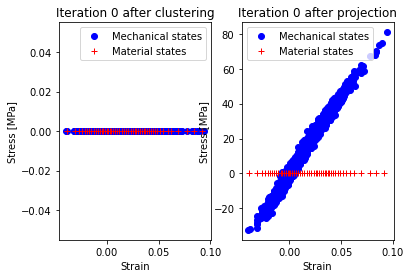

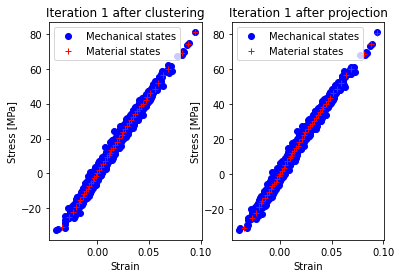

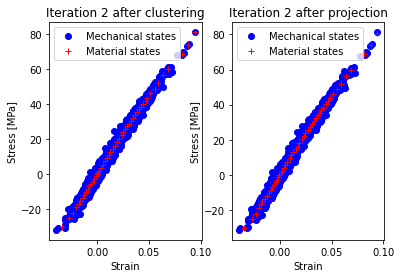

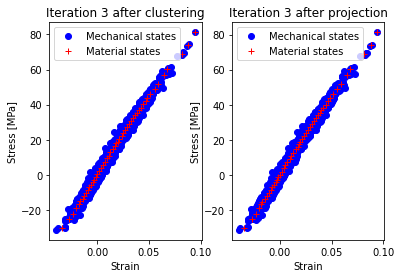

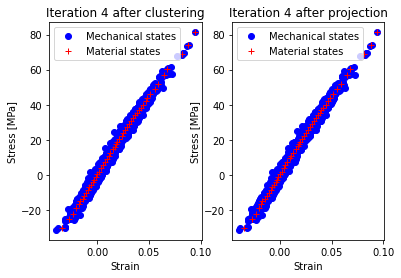

In [129]:
    
# Initialisation
E_e=B.dot(U)
S_e=np.zeros(Nelems)
E_e=Eref+dE_e
#ff=plt.figure()
#plt.yscale('log')
#plt.ylabel('DDI norm')
#plt.xlabel('Number of iteration')
ic=0
for resampling in range(5):
    ## selection matrix from k-means
    samples=np.c_[np.squeeze(E_e*np.sqrt(Co)),np.squeeze(S_e/np.sqrt(Co))]
    kmeans = KMeans(Ns).fit(samples)
    #.reshape(-1,1))
    ie=kmeans.labels_
    val=np.ones(Nelems)
    ii=np.arange(Nelems)
    S=smatrix((val,(ii,ie)),shape=(Nelems,Ns))
    STS=S.T*S
    STS=STS.diagonal()
    
    ## Material states
    Estar=S.T.dot(E_e)/STS
    Sstar=S.T.dot(S_e)/STS
    ff=plt.figure()
    plt.subplot(121)
    plt.plot(E_e,S_e/pix2m*1.e-6,'bo',label='Mechanical states')
    plt.plot(Estar,Sstar/pix2m*1.e-6,'r+',label='Material states');
    plt.xlabel('Strain')
    plt.ylabel('Stress [MPa]');
    plt.title('Iteration %d after clustering' % (resampling))
    plt.legend();

#    for iter in range(1):
    Estar_e=S.dot(Estar)
    Sstar_e=S.dot(Sstar)
    b=Dc.dot(Sstar_e)-Fext
    Lag=LU.solve(b)
    S_e=Sstar_e-iW*(Dc.T.dot(Lag))
#        Sstar=S.T.dot(S_e)/STS
#        ddi_norm=0.5*(Co*np.dot(E_e-Estar_e,W.dot(E_e-Estar_e))+1/Co*np.dot(S_e-Sstar_e,W.dot(S_e-Sstar_e)))
        #plt.plot(ic,ddi_norm,'o')
#        ic+=1
    Estar_e=S.dot(Estar)
    Sstar_e=S.dot(Sstar)
    ddi_norm=0.5*(Co*np.dot(E_e-Estar_e,W.dot(E_e-Estar_e))+1/Co*np.dot(S_e-Sstar_e,W.dot(S_e-Sstar_e)))
    print('***DDI loop Iteration %02d: DDI norm %6.3e ***' % (resampling,ddi_norm))
    plt.subplot(122)
    plt.plot(E_e,S_e/pix2m*1.e-6,'bo',label='Mechanical states')
    plt.plot(Estar,Sstar/pix2m*1.e-6,'r+',label='Material states');
    plt.xlabel('Strain')
    plt.ylabel('Stress [MPa]');
    plt.title('Iteration %d after projection' % (resampling))
    plt.legend();


    




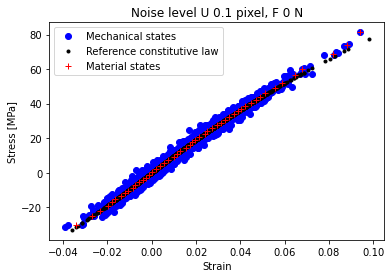

In [130]:

ff=plt.figure()
plt.plot(E_e,S_e/pix2m*1.e-6,'bo',label='Mechanical states')
plt.plot(Eref,Sref/pix2m*1.e-6,'k.',label='Reference constitutive law');
plt.plot(Estar,Sstar/pix2m*1.e-6,'r+',label='Material states');
plt.xlabel('Strain')
plt.ylabel('Stress [MPa]');
plt.title('Noise level U %g pixel, F %g N' % (stdu,stdf))
plt.legend();


## Illustrations

Text(0.5, 1.0, 'Labelling')

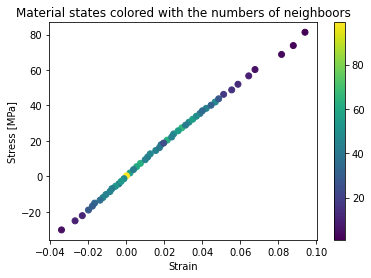

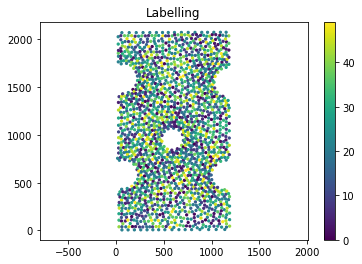

In [131]:
STS=S.T*S
iSTS=STS.diagonal()
ff=plt.figure()
plt.scatter(Estar,Sstar/pix2m*1.e-6,c=iSTS);
plt.xlabel('Strain')
plt.ylabel('Stress [MPa]');
plt.title('Material states colored with the numbers of neighboors')
plt.colorbar();


Xg=0.5*(X[conn[:,0]]+X[conn[:,1]])
ff=plt.figure();
plt.scatter(Xg[:,0],Xg[:,1],c=ie,s=5);
plt.colorbar();
plt.axis('equal');
plt.title('Labelling')


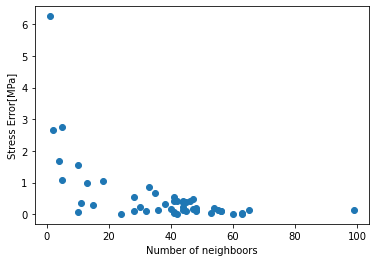

In [132]:
Sref=2e8*(1-np.exp(-np.abs(Estar)/0.2))*np.sign(Estar)*pix2m
plt.scatter(iSTS,np.abs(Sref-Sstar)/pix2m*1.e-6);
plt.xlabel('Number of neighboors')
plt.ylabel('Stress Error[MPa]');
